#Airline Travel Satisfaction Prediction

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/Data\ Mining\ Group\ Project

/content/gdrive/MyDrive/Data Mining Group Project


In [3]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Introduction
Introduce the problem you are trying to solve, questions you are trying to answer, and/or overall goal of the project.

### We are trying to predict whether a flight passenger will be satisfied with their flight based on information about their flight.

## About the Data
Describe where you got your data. This could include obtaining the data through Kaggle or other resources, or scraping the data yourself somehow.

Also provide information about the dataset itself (what features, the size of the dataset, and any additional statistics or visualizations you create to better understand the data).

In [4]:
train_df=pd.read_csv("airline_train.csv")
train_df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [5]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

There's 24 different features right now. Of type int, object, and float. Using the list from below we can understand how many unique values each feature has and what each feature is. Some of these are measurements and some are based on a satisfaction survey.

### From the data set's Kaggle page:

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

## Methods
This should include descriptions of any pre-processing steps and the modeling. If you experiment by trying things out in different iterations, it is encouraged to also talk about all of that! What worked or what didn’t? Were you able to improve upon the model(s) or gain new insights through different iterations?

First we need to remove columns with irrelevant information

In [6]:
columns_to_drop = ['Unnamed: 0', 'id']
train_df = train_df.drop(columns=columns_to_drop)
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

Then we enconde all of the non-numeric data using a label encoder

In [7]:
from sklearn.preprocessing import LabelEncoder

objs = ['object']

train_objs = train_df.select_dtypes(include=objs)

obj_list = train_objs.columns

for i in obj_list:
    le = LabelEncoder()
    le.fit(train_df[i])
    train_df[i] = le.transform(train_df[i])

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int64  
 1   Customer Type                      103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int64  
 4   Class                              103904 non-null  int64  
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

Now we need to check for null values in our dataset

In [9]:
train_df.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

Since there are so few null values relative to the scale of our dataset we can remove the entries that contain nulls

In [10]:
len(train_df)

103904

In [11]:
train_df = train_df.dropna(axis=0)

In [12]:
len(train_df)

103594

Next, we can make a heatmap to get a better look at the data

<Axes: >

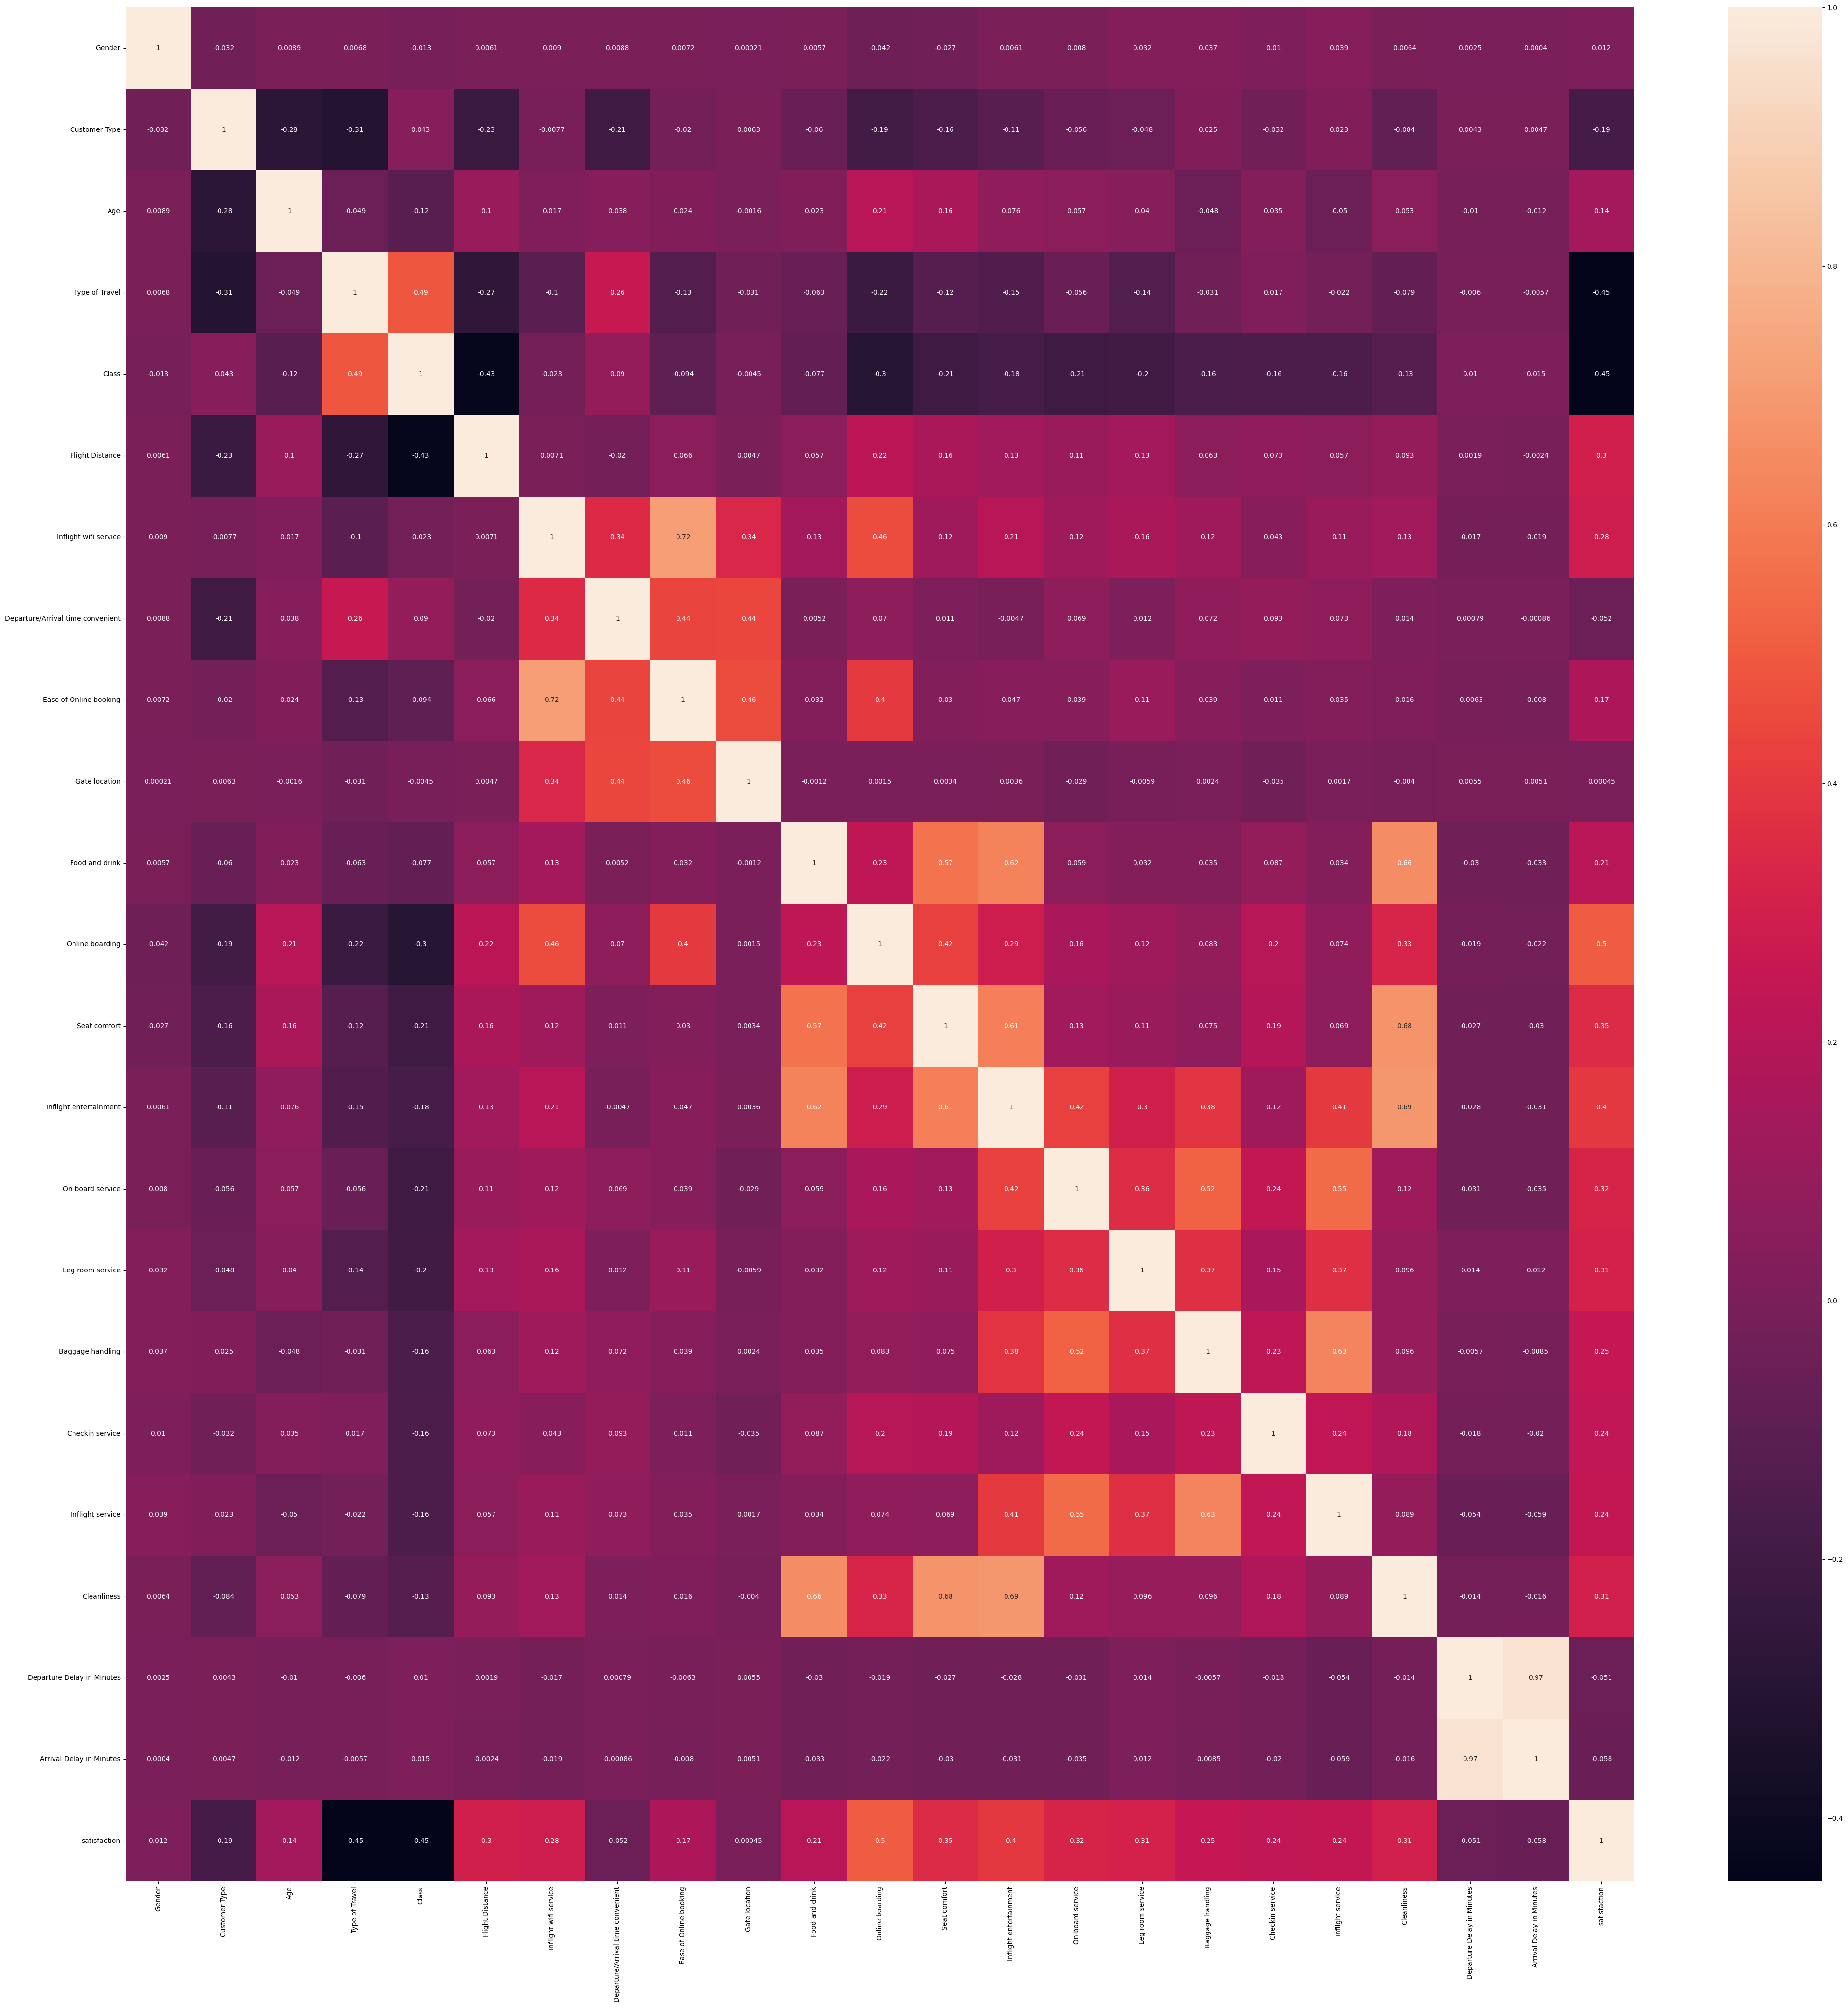

In [13]:
corr = train_df.corr()
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(corr, annot=True, ax=ax)

Some interesting trends can be found in this map:
*   Cleanliness is strongly correlated with in flight comfort
*   Flight class decisions tend to depend on flight distance
*   There is a strong correlation between class and satisfaction which is expected
*   There is surprisingly no correlation between class and percieved cleanliness



Now we need to do the same pre-processing steps to the testing data.

In [14]:
test_df=pd.read_csv("airline_test.csv")

columns_to_drop = ['Unnamed: 0', 'id']
test_df = test_df.drop(columns=columns_to_drop)

from sklearn.preprocessing import LabelEncoder

objs = ['object']

test_objs = test_df.select_dtypes(include=objs)

obj_list = test_objs.columns

for i in obj_list:
    le = LabelEncoder()
    le.fit(test_df[i])
    test_df[i] = le.transform(test_df[i])

test_df = test_df.dropna(axis=0)

The next step is to split our data into training and testing data.

In [15]:
X_train = train_df.drop(columns=['satisfaction'])
X_test = test_df.drop(columns=['satisfaction'])
y_train = train_df['satisfaction']
y_test = test_df['satisfaction']

# Naive Bayes


Now we will fit a Naive Bayes model on our data to see how well it performs.

In [16]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

clf.fit(X_train, y_train)

train_score = clf.score(X_train, y_train)

test_score = clf.score(X_test, y_test)

print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))

Train Accuracy: 0.8642971600671854, Test Accuracy: 0.8616228324257521


That performance is pretty good, now we can look at feature importances to see if a dataset with less features might perform better.

{'Food and drink': -0.0007896210205224019, 'Inflight service': -0.00036874722474273814, 'Seat comfort': -9.460007336330456e-05, 'Arrival Delay in Minutes': -5.79184122632137e-05, 'Gender': 7.33633222001595e-05, 'Departure Delay in Minutes': 0.00013128173446341762, 'Baggage handling': 0.00014865725814239283, 'Gate location': 0.00023746549027938712, 'Departure/Arrival time convenient': 0.000530918779079892, 'Age': 0.0006274494661853147, 'Cleanliness': 0.0012355927949495582, 'Ease of Online booking': 0.0019788790856613446, 'Inflight entertainment': 0.002040658725408795, 'Leg room service': 0.0022279282583933524, 'On-board service': 0.0025619244357781624, 'Checkin service': 0.0026526632816572526, 'Flight Distance': 0.003276251520358331, 'Class': 0.004181709365407293, 'Customer Type': 0.015205513832847472, 'Online boarding': 0.015485452825453239, 'Inflight wifi service': 0.018734675753422025, 'Type of Travel': 0.07089406722397051}


([<matplotlib.axis.XTick at 0x7991ab26a980>,
 [Text(0, 0, 'Food and drink'),
  Text(1, 0, 'Inflight service'),
  Text(2, 0, 'Seat comfort'),
  Text(3, 0, 'Arrival Delay in Minutes'),
  Text(4, 0, 'Gender'),
  Text(5, 0, 'Departure Delay in Minutes'),
  Text(6, 0, 'Baggage handling'),
  Text(7, 0, 'Gate location'),
  Text(8, 0, 'Departure/Arrival time convenient'),
  Text(9, 0, 'Age'),
  Text(10, 0, 'Cleanliness'),
  Text(11, 0, 'Ease of Online booking'),
  Text(12, 0, 'Inflight entertainment'),
  Text(13, 0, 'Leg room service'),
  Text(14, 0, 'On-board service'),
  Text(15, 0, 'Checkin service'),
  Text(16, 0, 'Flight Distance'),
  Text(17, 0, 'Class'),
  Text(18, 0, 'Customer Type'),
  Text(19, 0, 'Online boarding'),
  Text(20, 0, 'Inflight wifi service'),
  Text(21, 0, 'Type of Travel')])

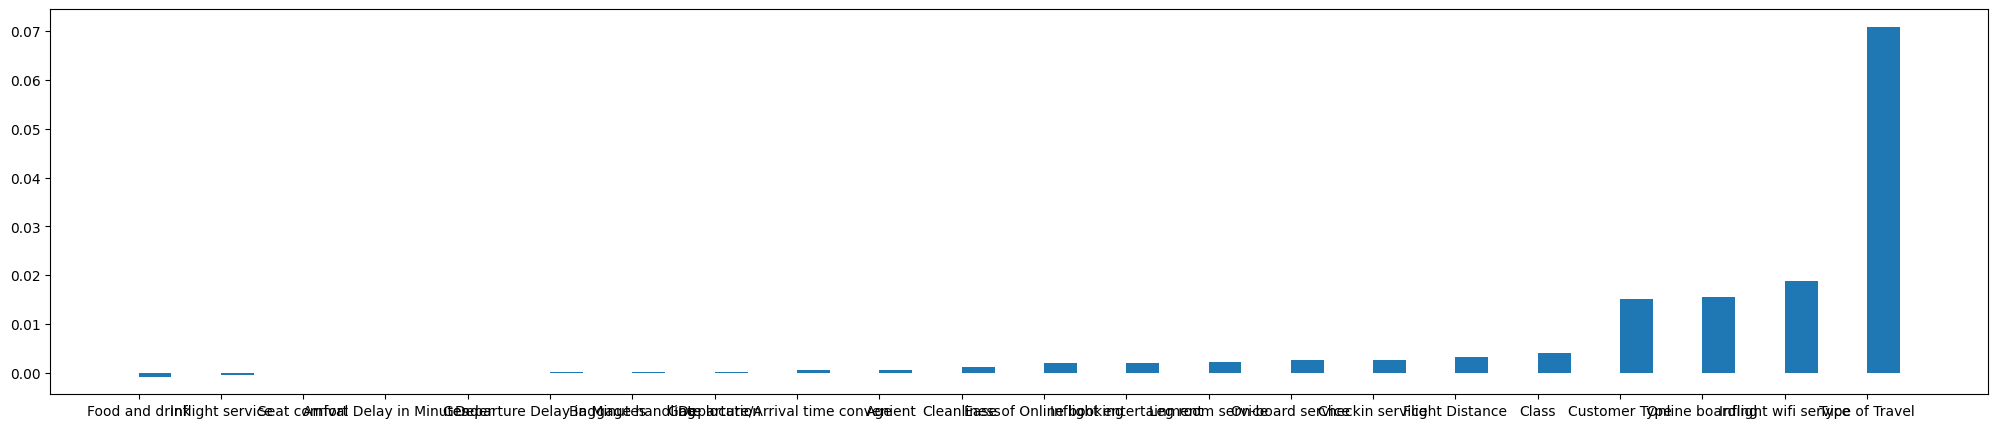

In [17]:
from sklearn.inspection import permutation_importance

model_fi = permutation_importance(clf, X_train, y_train)
imp_dict = {}

for i in range(22):
    imp_dict[X_train.columns[i]] = model_fi['importances_mean'][i]

imp_sorted = dict(sorted(imp_dict.items(), key=lambda item: item[1]))

print(imp_sorted)

plt.figure(figsize=(25, 5))
plt.bar(range(len(imp_sorted)), imp_sorted.values(), align='edge', width=0.4)
plt.xticks(range(len(imp_sorted)), list(imp_sorted.keys()))

In [18]:
partial_X_train = train_df[['Type of Travel', 'Inflight wifi service', 'Online boarding', 'Customer Type', 'Class']]
partial_X_test = test_df[['Type of Travel', 'Inflight wifi service', 'Online boarding', 'Customer Type', 'Class']]

In [19]:
clf = GaussianNB()

clf.fit(partial_X_train, y_train)

train_score = clf.score(partial_X_train, y_train)

test_score = clf.score(partial_X_test, y_test)

print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))

Train Accuracy: 0.8381952622738769, Test Accuracy: 0.8342409145328853


It seems that reducing the dataset down to only the most important features does not improve the performance of the model, this means that all of the features in the model hold enough importance to contribute to the performance of the model.

# Random Forest


Random forest operates by creating multiple decision trees and then aggregating them to create the most accurate tree possible. "Bootstrapping" is also present in a random forest model to prevent overfitting, leading to a more generalized model. We think a decision tree based approach might perform better on our dataset than the more generalized naive bayes approach.

Now we will fit a random forest model to see how it performs.

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


rf_clf = RandomForestClassifier(n_estimators=10, random_state=0)
rf_clf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf_clf.predict(X_test)

# Calculate the accuracy of the model
train_score = rf_clf.score(X_train, y_train)

test_score = rf_clf.score(X_test, y_test)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))

Train Accuracy: 0.997190957005232, Test Accuracy: 0.9568995481404241


The results of using random forest lead to a very high accuracy which means our model is very good at predicting when a customer is satisfied but it may be overfitting.

{'Gender': 0.0036990559298801127, 'Departure Delay in Minutes': 0.006942487016622589, 'Food and drink': 0.0074598914995077205, 'Departure/Arrival time convenient': 0.007979226596134948, 'Arrival Delay in Minutes': 0.00935382358051624, 'Ease of Online booking': 0.009483174701237518, 'On-board service': 0.013856014827113561, 'Flight Distance': 0.01448539490704095, 'Gate location': 0.014948742205147015, 'Cleanliness': 0.01726740930941948, 'Age': 0.018170936540726303, 'Leg room service': 0.019298414966117748, 'Inflight entertainment': 0.023547695812498805, 'Baggage handling': 0.024783288607448294, 'Inflight service': 0.02755371932737418, 'Checkin service': 0.028775797826128914, 'Seat comfort': 0.02995347220881519, 'Customer Type': 0.0555012838581385, 'Online boarding': 0.05663841535224048, 'Class': 0.06402108230206385, 'Type of Travel': 0.12097225708052592, 'Inflight wifi service': 0.17074347935208606}


([<matplotlib.axis.XTick at 0x7991ab00c340>,
 [Text(0, 0, 'Gender'),
  Text(1, 0, 'Departure Delay in Minutes'),
  Text(2, 0, 'Food and drink'),
  Text(3, 0, 'Departure/Arrival time convenient'),
  Text(4, 0, 'Arrival Delay in Minutes'),
  Text(5, 0, 'Ease of Online booking'),
  Text(6, 0, 'On-board service'),
  Text(7, 0, 'Flight Distance'),
  Text(8, 0, 'Gate location'),
  Text(9, 0, 'Cleanliness'),
  Text(10, 0, 'Age'),
  Text(11, 0, 'Leg room service'),
  Text(12, 0, 'Inflight entertainment'),
  Text(13, 0, 'Baggage handling'),
  Text(14, 0, 'Inflight service'),
  Text(15, 0, 'Checkin service'),
  Text(16, 0, 'Seat comfort'),
  Text(17, 0, 'Customer Type'),
  Text(18, 0, 'Online boarding'),
  Text(19, 0, 'Class'),
  Text(20, 0, 'Type of Travel'),
  Text(21, 0, 'Inflight wifi service')])

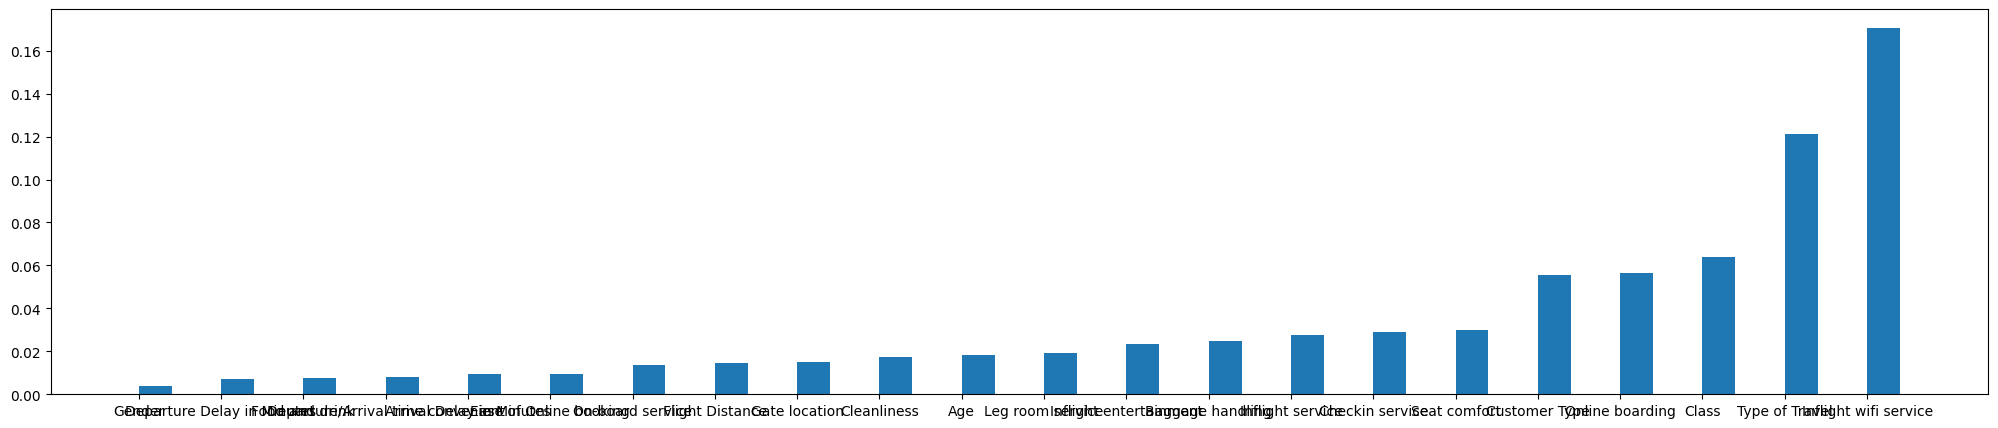

In [21]:
from sklearn.inspection import permutation_importance

model_fi = permutation_importance(rf_clf, X_train, y_train)
imp_dict = {}

for i in range(22):
    imp_dict[X_train.columns[i]] = model_fi['importances_mean'][i]

imp_sorted = dict(sorted(imp_dict.items(), key=lambda item: item[1]))

print(imp_sorted)

plt.figure(figsize=(25, 5))
plt.bar(range(len(imp_sorted)), imp_sorted.values(), align='edge', width=0.4)
plt.xticks(range(len(imp_sorted)), list(imp_sorted.keys()))

In [22]:
partial_X_train = train_df[['Type of Travel', 'Inflight wifi service', 'Online boarding', 'Customer Type', 'Class']]
partial_X_test = test_df[['Type of Travel', 'Inflight wifi service', 'Online boarding', 'Customer Type', 'Class']]

In [23]:
rf_clf = RandomForestClassifier(n_estimators=10, random_state=0)
rf_clf.fit(partial_X_train, y_train)

# Predict the labels for the test set
y_pred = rf_clf.predict(partial_X_test)

# Calculate the accuracy of the model
train_score = rf_clf.score(partial_X_train, y_train)

test_score = rf_clf.score(partial_X_test, y_test)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))

Train Accuracy: 0.9080641736007877, Test Accuracy: 0.9057660371528985


## Evaluation
Based on your goal/model — how do you evaluate performance? What are the results?

For example, if you are running classification models, what are the accuracies, f1 scores, etc.? If you had questions in the introduction, were you able to answer them (discuss that)? etc.

Think about the best way to evaluate based on what you are trying to accomplish.

For a task like this we feel accuracy is the best metric to use as we don't have any kind of bias, like trying to eliminate false positives as much as possible, and are instead just trying to most accurately predict the satisfaction of a survey response regardless of the class.

Naive Bayes: Train Accuracy: 0.86, Test Accuracy: 0.86

Naive Bayes (Pruned Features): Train Accuracy: 0.84, Test Accuracy: 0.83

Random Forest: Train Accuracy: 0.99, Test Accuracy: 0.96

When using a Naive Bayes approach, determining the accuracy of the unreduced data, we can see that we have an accuracy of 86%. This means our model is relativley accurate in determining the the instances of the training set. However, as mentioned above we see the accuracy decrease after removing features. This proves that many features in this dataset have important weight to them, in turn effecting the performance of our model. This is an important fact to consider for our continued evaluations of this dataset. This detail also highlights the tradeoff that we may face with overfitting and underfitting. Are the tradeoffs worth it? Should we reduce our accuracy at the benefit of reducing complexity? Is it worth it to keep a include the complexity at the benefit of the model? We feel this complexity is worth it as it leads to a stronger model overall.

Furthermore, when using a Random Forest approach we are able to produce a much more accurate model with an almost 96% testing accuracy and nearly perfect training accuracy. This incredibly high accuracy indicates that this model is likely overfit on our data a bit.



## Storytelling and Conclusion
What insights did you gain through your project? Were you able to answer your initial problems? Obtain your initial goal? What stories can you tell? Do you have future steps in mind or things that could have been improved? ***For full credit here, you will need to show your critical thinking throughout.***

What have you learned throughout this project and the entire class?

Through this project we learned it was possible to fairly accurately predict the level of satisfaction that a customer experienced based on their survery responses about their flight experiences. We created two models, one with Naive Bayes and one with Random Forest. The Naive Bayes model was fairly accurate and could likely be generalized fairly well while the Random Forest model was much more accurate but was likely experiencing overfitting to some extent. This poses the question of which model is better.

For most tasks we would say the model with fairly high accuracy and good generalization is the best, however, in this case we think this might not be the case. Since this model is working at its best when it is being both trained and tested on data acquired from the same airline all we really care about is performance and overfitting becomes much less of a problem. This means we feel going forward with the Random Forest model would be the best option.

Additionally, we feel looking at feature importances alone can be just as important as the models themselves in this particular problem. Looking at feature importances would allow airlines to see what needs to be improved first to most drastically improve flight satisfaction.

## Impact Section
Discuss the impact of your project. This can be socially, ethically, etc. It cannot be something like "our project has no impact" or "our project has no negative impact." Even the most well-intentioned projects *could* have negative impact. We will not be checking for "right" or "wrong" answers, but showing your critical thinking.



*   Using either of the models we produced here could be very beneficial for an airline
*   Internal metrics could be used to predict what conditions lead to satisfied customers so they know what to prioritize
*   They have access to even more data and could produce a more accurate model
*   Other industries like resturaunts or thetres could use a similar system
*   Becoming too reliant on this model could lead to a disconnect with current customers so it is important that collected data remains up to date

